===== 二分类逻辑斯蒂回归 =====
二分类模型评估:
准确率: 0.9467

混淆矩阵:
 [[71  7]
 [ 1 71]]

分类报告:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95        78
           1       0.91      0.99      0.95        72

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



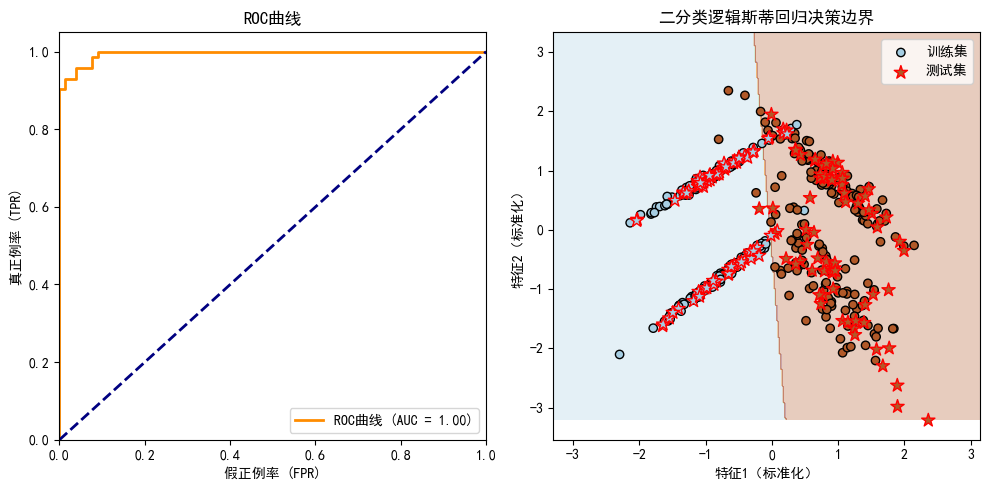


二分类模型参数:
系数 (w): [[4.35045409 0.31847956]]
截距 (b): [0.14075131]

===== 多分类逻辑斯蒂回归 =====
多分类模型评估:
准确率: 0.9111

混淆矩阵:
 [[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]

分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.69      0.82        13
   virginica       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



D:\anaconda\envs\financial-ml\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


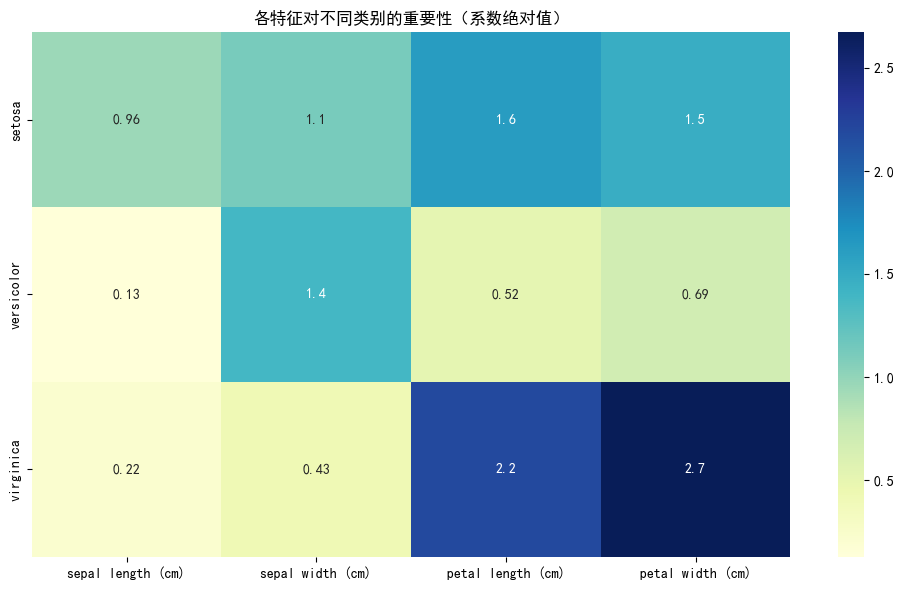

D:\anaconda\envs\financial-ml\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


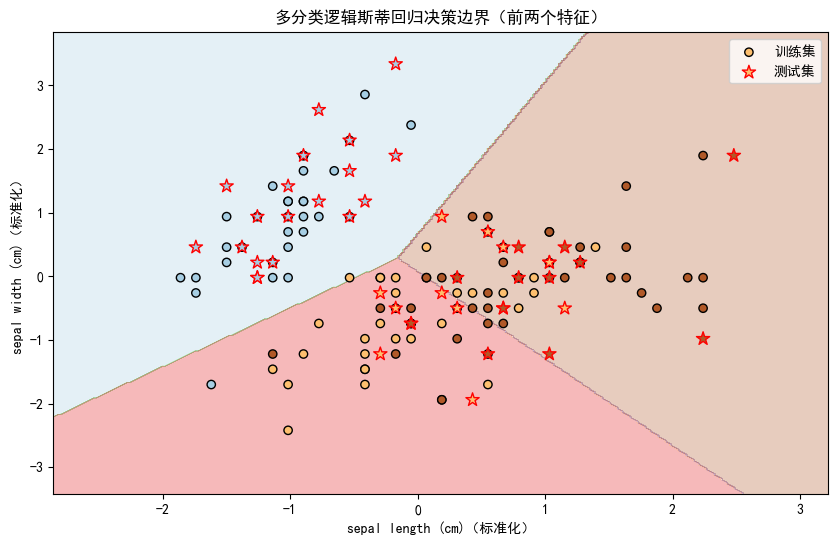


新样本预测结果: setosa
预测概率: [[0.9196 0.0804 0.    ]]


In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# ----------------------
# 1. 二分类示例（模拟数据集）
# ----------------------
print("===== 二分类逻辑斯蒂回归 =====")

# 生成模拟二分类数据
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2,
    n_redundant=0, random_state=42, class_sep=1.5
)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 特征标准化（逻辑斯蒂回归对特征尺度敏感）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练二分类逻辑斯蒂回归模型
lr_binary = LogisticRegression(random_state=42)
lr_binary.fit(X_train_scaled, y_train)

# 预测
y_pred = lr_binary.predict(X_test_scaled)
y_pred_proba = lr_binary.predict_proba(X_test_scaled)[:, 1]  # 正类概率

# 模型评估
print("二分类模型评估:")
print(f"准确率: {accuracy_score(y_test, y_pred):.4f}")
print("\n混淆矩阵:\n", confusion_matrix(y_test, y_pred))
print("\n分类报告:\n", classification_report(y_test, y_pred))

# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正例率 (FPR)')
plt.ylabel('真正例率 (TPR)')
plt.title('ROC曲线')
plt.legend(loc="lower right")

# 绘制决策边界
plt.subplot(1, 2, 2)
h = 0.02  # 网格步长
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = lr_binary.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', label='训练集')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='red', marker='*', s=100, label='测试集')
plt.title('二分类逻辑斯蒂回归决策边界')
plt.xlabel('特征1（标准化）')
plt.ylabel('特征2（标准化）')
plt.legend()

plt.tight_layout()
plt.show()

# 查看模型参数
print("\n二分类模型参数:")
print(f"系数 (w): {lr_binary.coef_}")
print(f"截距 (b): {lr_binary.intercept_}")

# ----------------------
# 2. 多分类示例（鸢尾花数据集）
# ----------------------
print("\n===== 多分类逻辑斯蒂回归 =====")

# 加载鸢尾花数据集
iris = load_iris()
X_multi = iris.data
y_multi = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# 划分训练集和测试集
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42
)

# 特征标准化
scaler_multi = StandardScaler()
X_train_multi_scaled = scaler_multi.fit_transform(X_train_multi)
X_test_multi_scaled = scaler_multi.transform(X_test_multi)

# 训练多分类逻辑斯蒂回归（使用ovr策略：一对多）
lr_multi = LogisticRegression(
    multi_class='ovr',  # 多分类策略：one-vs-rest
    max_iter=200,       # 增加迭代次数确保收敛
    random_state=42
)
lr_multi.fit(X_train_multi_scaled, y_train_multi)

# 预测
y_pred_multi = lr_multi.predict(X_test_multi_scaled)
y_pred_proba_multi = lr_multi.predict_proba(X_test_multi_scaled)

# 模型评估
print("多分类模型评估:")
print(f"准确率: {accuracy_score(y_test_multi, y_pred_multi):.4f}")
print("\n混淆矩阵:\n", confusion_matrix(y_test_multi, y_pred_multi))
print("\n分类报告:\n", classification_report(
    y_test_multi, y_pred_multi, target_names=class_names
))

# 绘制特征重要性（系数绝对值）
plt.figure(figsize=(10, 6))
coef = np.abs(lr_multi.coef_)  # 取系数绝对值作为重要性
sns.heatmap(coef, annot=True, cmap='YlGnBu', 
            xticklabels=feature_names, 
            yticklabels=class_names)
plt.title('各特征对不同类别的重要性（系数绝对值）')
plt.tight_layout()
plt.show()

# 决策边界可视化（使用前两个特征）
X_vis = X_multi[:, :2]  # 只取前两个特征
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_multi, test_size=0.3, random_state=42
)

# 标准化可视化用的特征
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)

# 训练可视化模型
lr_vis = LogisticRegression(multi_class='ovr', max_iter=200, random_state=42)
lr_vis.fit(X_train_vis_scaled, y_train_vis)

# 创建网格
h = 0.02
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 预测网格点类别
Z = lr_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_vis_scaled[:, 0], X_train_vis_scaled[:, 1], c=y_train_vis, cmap=plt.cm.Paired, edgecolors='k', label='训练集')
plt.scatter(X_test_vis_scaled[:, 0], X_test_vis_scaled[:, 1], c=y_test_vis, cmap=plt.cm.Paired, edgecolors='red', marker='*', s=100, label='测试集')
plt.title('多分类逻辑斯蒂回归决策边界（前两个特征）')
plt.xlabel(feature_names[0] + '（标准化）')
plt.ylabel(feature_names[1] + '（标准化）')
plt.legend()
plt.show()

# 新样本预测
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # 类似山鸢尾的特征
new_sample_scaled = scaler_multi.transform(new_sample)
prediction = lr_multi.predict(new_sample_scaled)
prediction_proba = lr_multi.predict_proba(new_sample_scaled)

print(f"\n新样本预测结果: {class_names[prediction][0]}")
print(f"预测概率: {np.round(prediction_proba, 4)}")
